### Core analysis comparing behaviours (eg. trip length, day-of-week patterns, start/end stations heatmaps)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.append('/Users/kanghong/Documents/Developer/Google-Capstone/cyclist-case-study/src/')

from trip_analysis import season_match, filter_unfeasible_rides
from data_viz import generate_prop_plot, generate_pie, generate_hist_plot, generate_stack_hist, plot_pivot_table
from data_cleaning import time_to_minutes, extract_hour, extract_month

In [3]:
cyclistic_data = pd.read_csv('/Users/kanghong/Documents/Developer/Google-Capstone/cyclist-case-study/data/processed/cyclistic_data_cleaned.csv')

cyclistic_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day
0,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,41.892278,-87.612043,41.902973,-87.631280,casual,00:19:08,1.990,Saturday,Saturday
1,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,42.010587,-87.662412,42.001044,-87.661198,casual,00:10:09,1.065,Tuesday,Tuesday
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday
3,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,41.892270,-87.611946,41.936253,-87.652662,member,00:18:38,5.939,Friday,Friday
4,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,41.903486,-87.643353,41.902973,-87.631280,casual,00:06:44,1.003,Wednesday,Wednesday


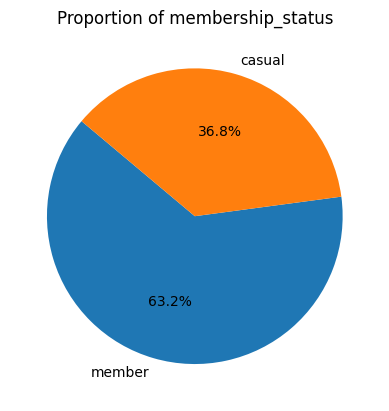

In [4]:
generate_pie(cyclistic_data, 'membership_status')


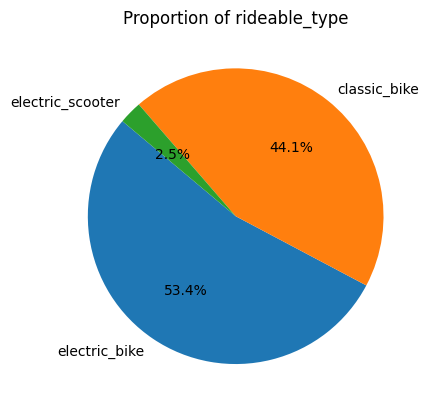

In [5]:
generate_pie(cyclistic_data, 'rideable_type')


In [6]:
'''casual_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'casual']
member_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'member']'''

"casual_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'casual']\nmember_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'member']"

#### Compare rideables, ride length and ride distance

In [7]:
cyclistic_data['ride_length(min)'] = cyclistic_data['ride_length'].apply(time_to_minutes)

In [8]:
cyclistic_data = filter_unfeasible_rides(cyclistic_data)

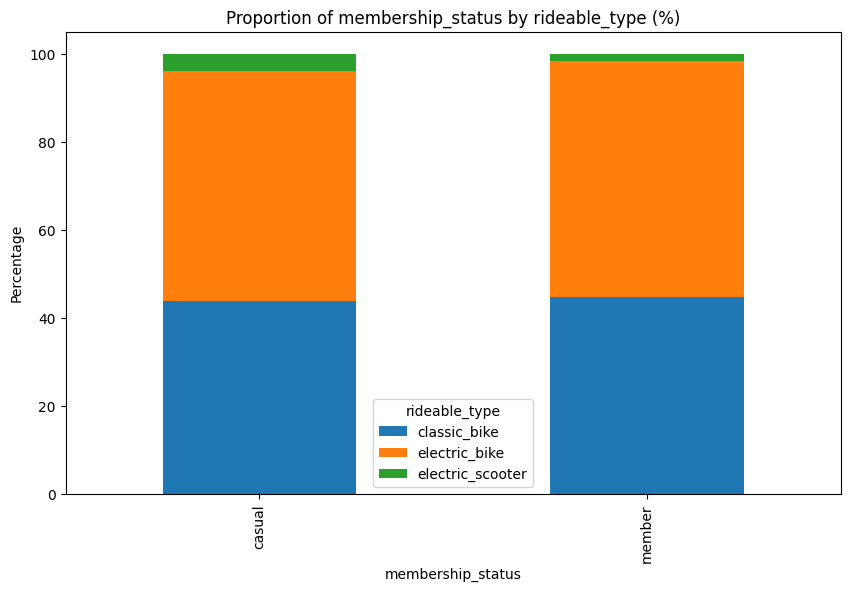

In [9]:
generate_stack_hist(cyclistic_data, 'membership_status', 'rideable_type')

/var/folders/p5/x7yhrwkj5_54__9llg9vgy600000gn/T/ipykernel_2438/1547140878.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')


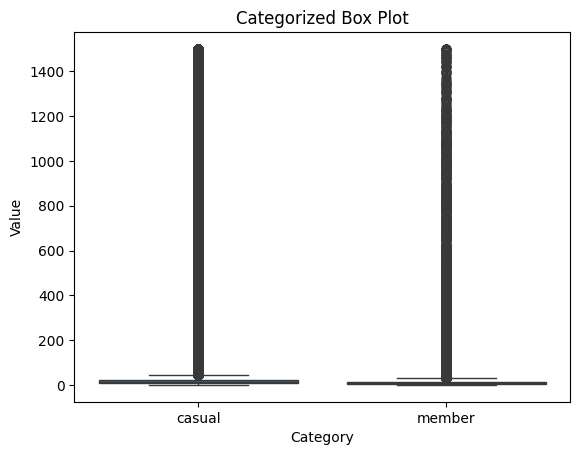

In [10]:
sns.boxplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')

# Customize the plot
plt.title('Categorized Box Plot')
plt.xlabel('Category')
plt.ylabel('Value')

# Show the plot
plt.show()

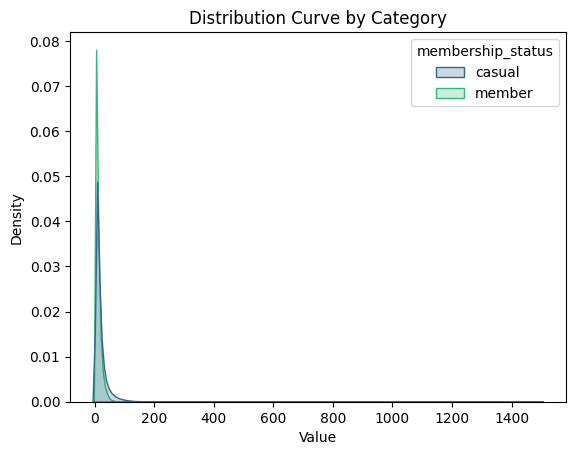

In [11]:
sns.kdeplot(data=cyclistic_data, x='ride_length(min)', hue='membership_status', palette='viridis', fill=True, common_norm=False)

# Customize the plot
plt.title('Distribution Curve by Category')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

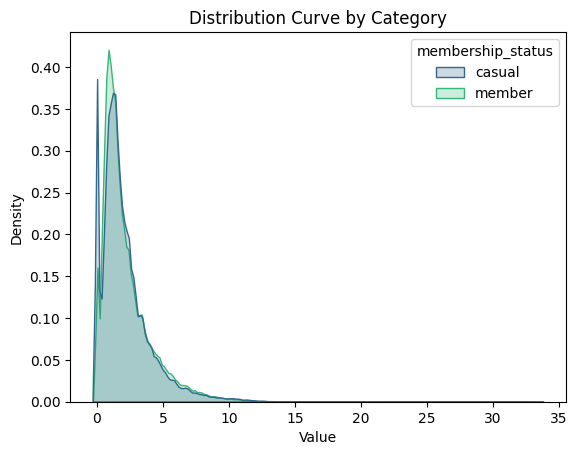

In [12]:
sns.kdeplot(data=cyclistic_data, x='ride_distance(km)', hue='membership_status', palette='viridis', fill=True, common_norm=False)

# Customize the plot
plt.title('Distribution Curve by Category')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

/var/folders/p5/x7yhrwkj5_54__9llg9vgy600000gn/T/ipykernel_2438/1369405317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')


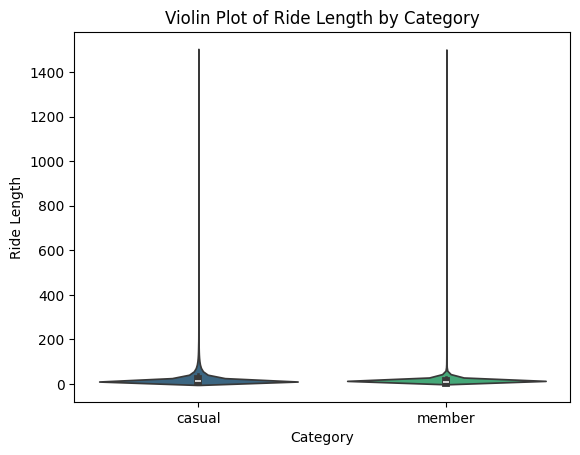

In [13]:
sns.violinplot(x='membership_status', y='ride_length(min)', data=cyclistic_data, palette='viridis')

# Customize the plot
plt.title('Violin Plot of Ride Length by Category')
plt.xlabel('Category')
plt.ylabel('Ride Length')

# Show the plot
plt.show()

### Compare days of riding

##### Members ride more throughout the week, casuals ride more on the weekends

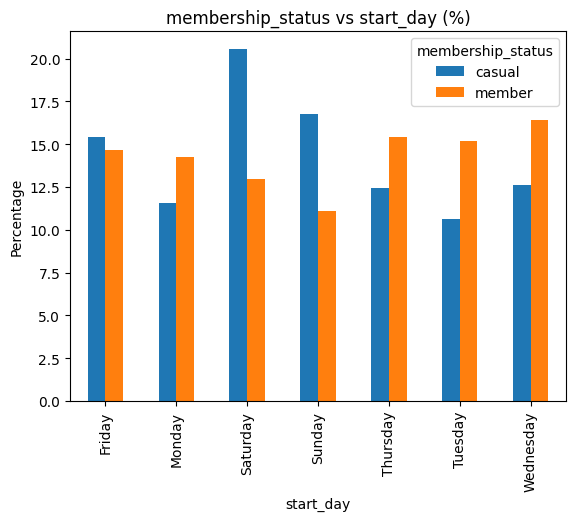

In [14]:
generate_hist_plot(cyclistic_data, 'membership_status', 'start_day')

#### Casual rides longer than members, especially on the weekends

In [15]:
'''
pivot_table = cyclistic_data.pivot_table(
    values='ride_length(min)', 
    index='membership_status', 
    columns='start_day', 
    aggfunc='median')


print(pivot_table)
'''

"\npivot_table = cyclistic_data.pivot_table(\n    values='ride_length(min)', \n    index='membership_status', \n    columns='start_day', \n    aggfunc='median')\n\n\nprint(pivot_table)\n"

In [16]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Average Ride Length by Day of Week and Membership Status')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Length (minutes)')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Average Ride Length by Day of Week and Membership Status')\nplt.xlabel('Day of Week')\nplt.ylabel('Average Ride Length (minutes)')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

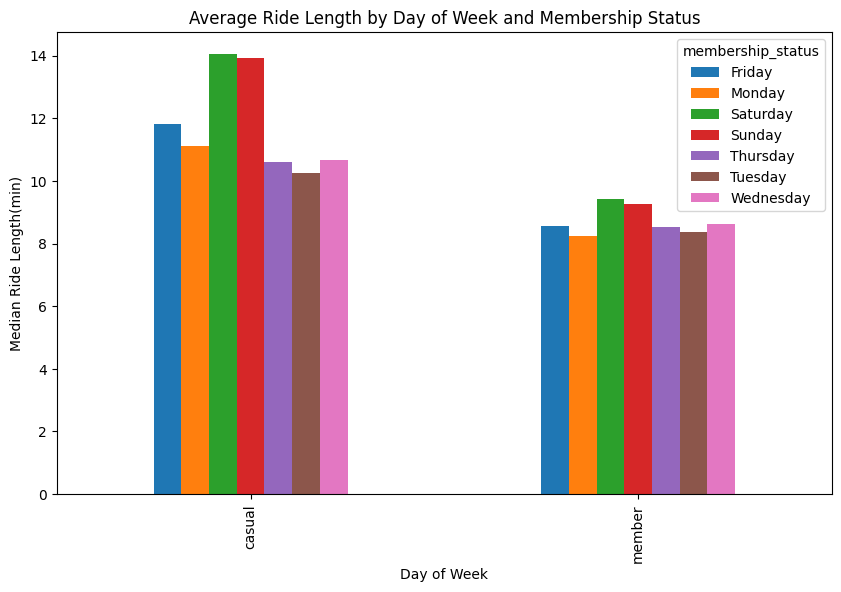

In [17]:
plot_pivot_table(cyclistic_data, values='ride_length(min)', index='membership_status', columns='start_day', aggfunc='median', 
                 title="Average Ride Length by Day of Week and Membership Status", 
                 xlabel='Day of Week', ylabel= 'Median Ride Length(min)', legend_title='membership_status', figsize=(10, 6))

### Number of rides for users by day

In [18]:
'''pivot_table = cyclistic_data.pivot_table(
    index='start_day', 
    columns='membership_status', 
    aggfunc='size')


print(pivot_table)'''

"pivot_table = cyclistic_data.pivot_table(\n    index='start_day', \n    columns='membership_status', \n    aggfunc='size')\n\n\nprint(pivot_table)"

##### Members ride more frequently compared to members

In [19]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('No.of Rides by Day of Week and Membership Status')
plt.xlabel('Day of Week')
plt.ylabel('No. of Rides')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('No.of Rides by Day of Week and Membership Status')\nplt.xlabel('Day of Week')\nplt.ylabel('No. of Rides')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

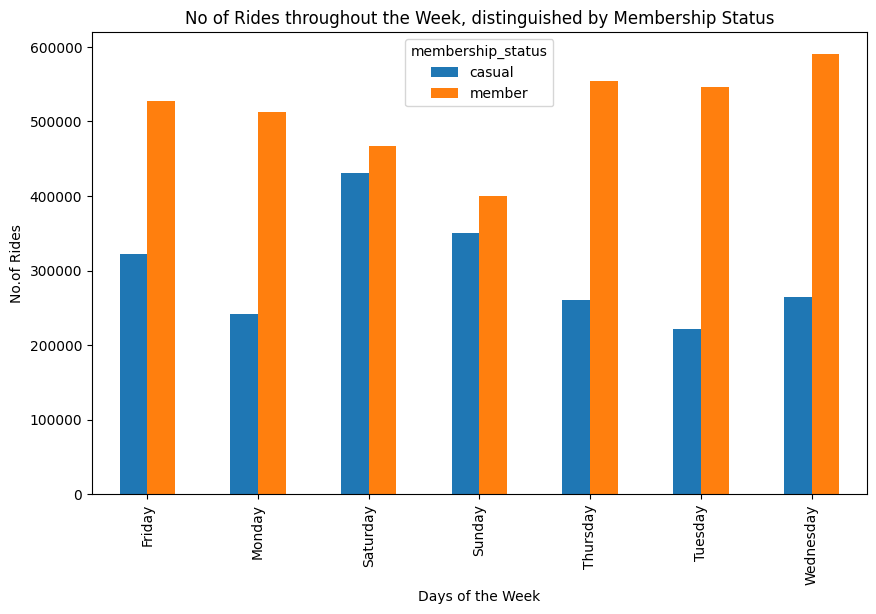

In [20]:
plot_pivot_table(data=cyclistic_data, index='start_day', columns='membership_status', aggfunc='size', 
                 title='No of Rides throughout the Week, distinguished by Membership Status',
                 xlabel='Days of the Week', ylabel='No.of Rides', legend_title='membership_status')

In [21]:
'''
map_center = [cyclistic_data['start_lat'].mean(), cyclistic_data['start_lng'].mean()]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add markers for each location
for _, row in cyclistic_data.iterrows():
    folium.Marker([row['start_lat'], row['start_lng']]).add_to(mymap)

# Save the map to an HTML file
mymap.save('testmap.html')
'''

"\nmap_center = [cyclistic_data['start_lat'].mean(), cyclistic_data['start_lng'].mean()]\nmymap = folium.Map(location=map_center, zoom_start=2)\n\n# Add markers for each location\nfor _, row in cyclistic_data.iterrows():\n    folium.Marker([row['start_lat'], row['start_lng']]).add_to(mymap)\n\n# Save the map to an HTML file\nmymap.save('testmap.html')\n"

### Explore seasonal trends, holidays


In [22]:
cyclistic_data.shape

(5690040, 13)

In [23]:
'''sampled_data = cyclistic_data.sample(frac=0.01)
sampled_data.shape'''


'sampled_data = cyclistic_data.sample(frac=0.01)\nsampled_data.shape'

In [24]:
'''import geopandas as gpd

gdf = gpd.GeoDataFrame(sampled_data, geometry=gpd.points_from_xy(sampled_data.start_lng, sampled_data.start_lat))'''

'import geopandas as gpd\n\ngdf = gpd.GeoDataFrame(sampled_data, geometry=gpd.points_from_xy(sampled_data.start_lng, sampled_data.start_lat))'

In [25]:
'''from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
gdf['cluster'] = kmeans.fit_predict(gdf[['start_lat', 'start_lng']])'''

"from sklearn.cluster import KMeans\n\nkmeans = KMeans(n_clusters=5)\ngdf['cluster'] = kmeans.fit_predict(gdf[['start_lat', 'start_lng']])"

In [26]:
'''from folium.plugins import HeatMap

map_center = [gdf['start_lat'].mean(), gdf['start_lng'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Create a heatmap layer
heat_data = [[row['start_lat'], row['start_lng']] for _, row in sampled_data.iterrows()]
HeatMap(heat_data).add_to(mymap)

# Save the map to an HTML file
mymap.save('bike-sharing-heatmap.html')'''

"from folium.plugins import HeatMap\n\nmap_center = [gdf['start_lat'].mean(), gdf['start_lng'].mean()]\nmymap = folium.Map(location=map_center, zoom_start=12)\n\n# Create a heatmap layer\nheat_data = [[row['start_lat'], row['start_lng']] for _, row in sampled_data.iterrows()]\nHeatMap(heat_data).add_to(mymap)\n\n# Save the map to an HTML file\nmymap.save('bike-sharing-heatmap.html')"

In [27]:
cyclistic_data = extract_month(cyclistic_data)
cyclistic_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day,ride_length(min),month
0,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,41.892278,-87.612043,41.902973,-87.631280,casual,00:19:08,1.990,Saturday,Saturday,19.133333,May
1,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,42.010587,-87.662412,42.001044,-87.661198,casual,00:10:09,1.065,Tuesday,Tuesday,10.150000,May
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday,23.200000,May
3,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,41.892270,-87.611946,41.936253,-87.652662,member,00:18:38,5.939,Friday,Friday,18.633333,May
4,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,41.903486,-87.643353,41.902973,-87.631280,casual,00:06:44,1.003,Wednesday,Wednesday,6.733333,May


In [28]:
spring_cyclistic_data = season_match(cyclistic_data, 'spring')
summer_cyclistic_data = season_match(cyclistic_data, 'summer')
autumn_cyclistic_data = season_match(cyclistic_data, 'autumn')
winter_cyclistic_data = season_match(cyclistic_data, 'winter')

##### No electric scooters in the spring

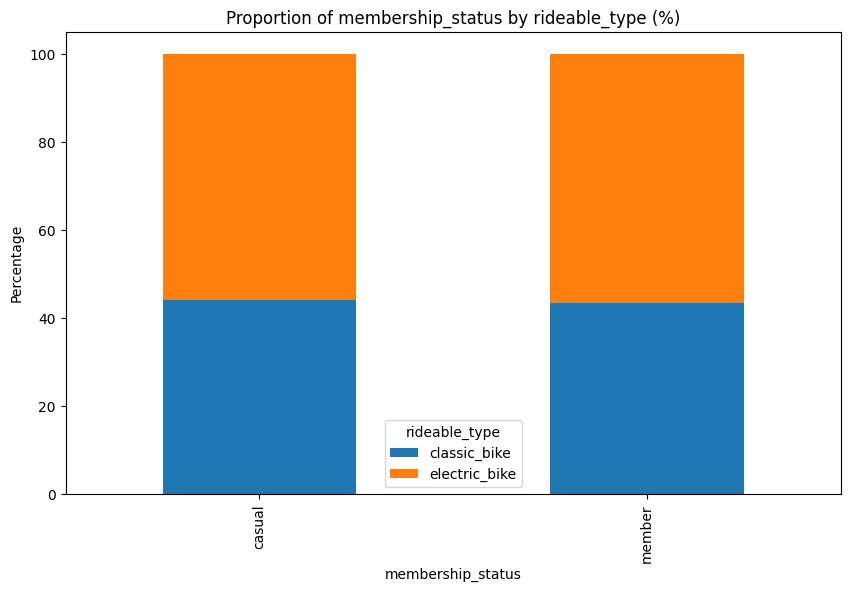

In [29]:
#generate_stack_hist(spring_cyclistic_data, 'membership_status', 'rideable_type', 'spring')
generate_stack_hist(data=spring_cyclistic_data, category='membership_status', subcategory='rideable_type')

##### Casual riders ride more on the weekends in the summer

start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             17.339088  11.720704  21.192824  14.647271  11.888484   
member             15.551868  13.901653  12.944998  10.018024  15.469717   

start_day            Tuesday  Wednesday  
membership_status                        
casual             10.532045  12.679583  
member             15.241324  16.872417  


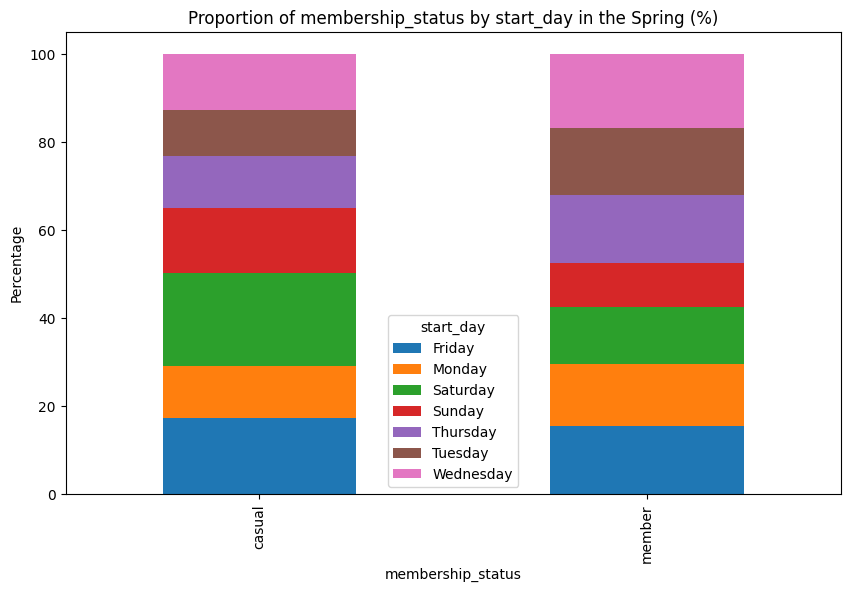

In [30]:
# generate_prop_plot(spring_cyclistic_data, 'membership_status', 'start_day', 'spring')
generate_prop_plot(data=spring_cyclistic_data, cat1='membership_status', cat2='start_day', event='Spring')

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                48.104046      51.889193          0.006761
member                48.057791      51.940710          0.001499


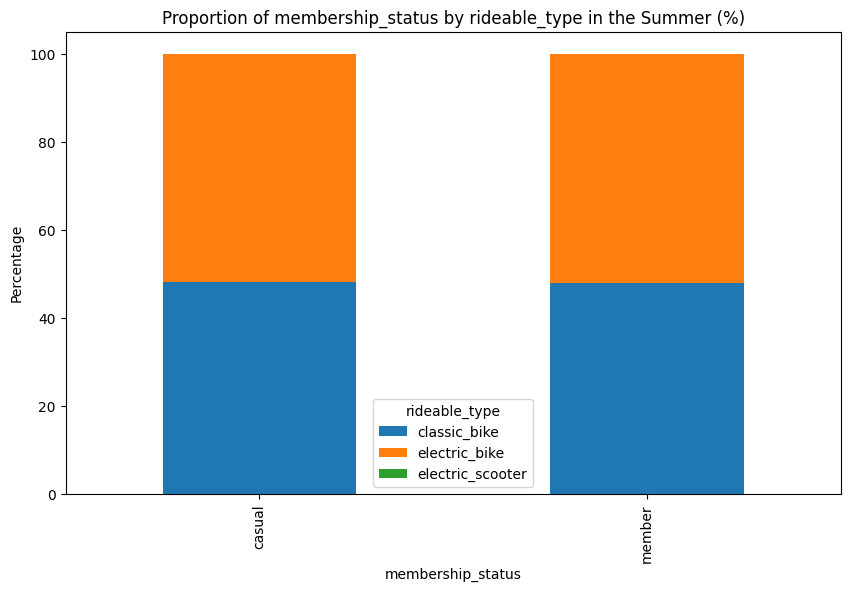

In [31]:
# generate_prop_plot(summer_cyclistic_data, 'membership_status', 'rideable_type', 'summer')
generate_prop_plot(data=summer_cyclistic_data, cat1='membership_status', cat2='rideable_type', event='Summer')

start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             15.180721  10.432439  21.951853  16.899661  12.487485   
member             14.457016  13.608446  14.216484  11.948080  15.015495   

start_day            Tuesday  Wednesday  
membership_status                        
casual             10.256983  12.790859  
member             14.628339  16.126140  


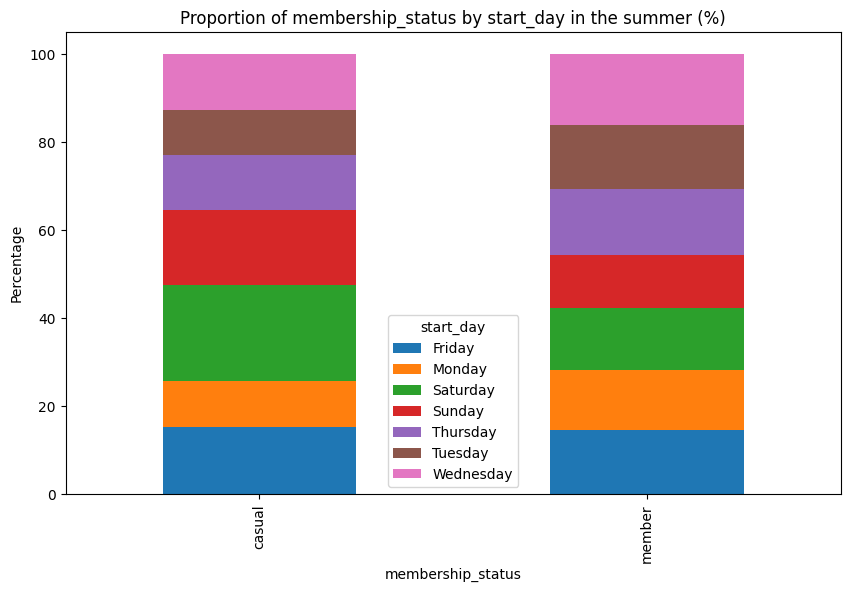

In [32]:
generate_prop_plot(data=summer_cyclistic_data, cat1='membership_status', cat2='start_day', event='summer')

##### Casuals enjoy riding electric scooters in autumn

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                39.553126      47.631479         12.815395
member                43.733071      51.104542          5.162387


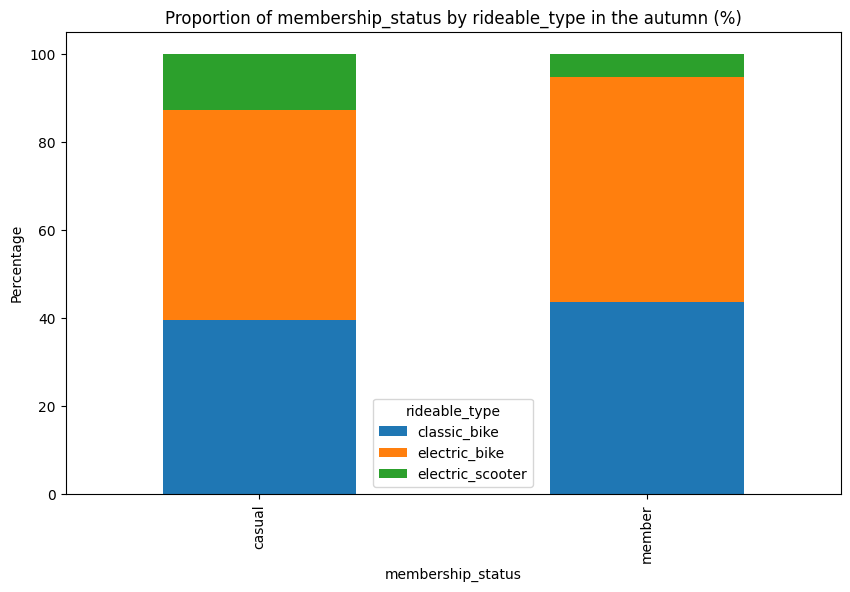

In [33]:
generate_prop_plot(data=autumn_cyclistic_data, cat1='membership_status', cat2='rideable_type', event='autumn')

start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             14.576768  12.720518  18.878857  18.400471  12.524605   
member             14.388173  14.507212  12.356112  11.373364  15.525546   

start_day            Tuesday  Wednesday  
membership_status                        
casual             10.735353  12.163428  
member             15.262540  16.587051  


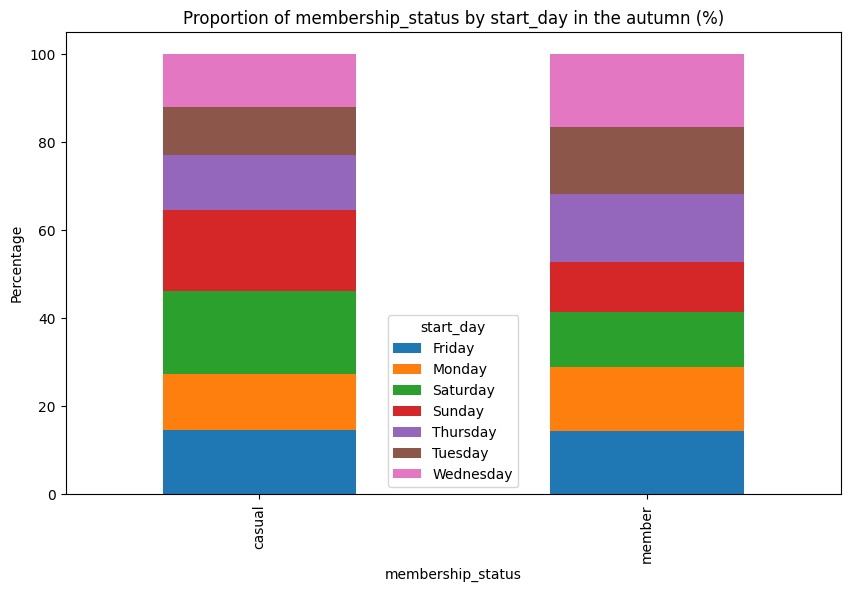

In [34]:
generate_prop_plot(data=autumn_cyclistic_data, cat1='membership_status', cat2='start_day', event='autumn')

rideable_type      classic_bike  electric_bike
membership_status                             
casual                30.152561      69.847439
member                38.802103      61.197897


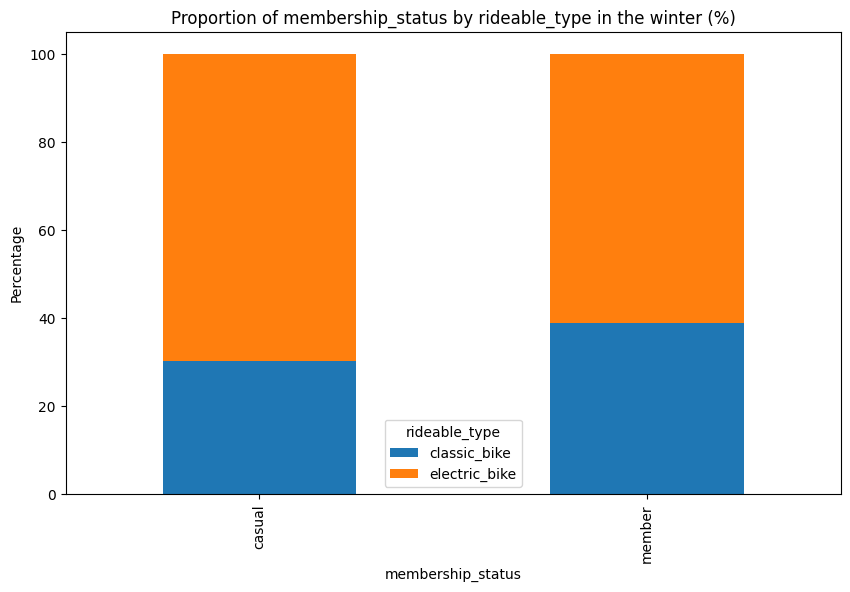

In [35]:
generate_prop_plot(data=winter_cyclistic_data, cat1='membership_status', cat2='rideable_type', event='winter')

start_day             Friday     Monday   Saturday     Sunday   Thursday  \
membership_status                                                          
casual             14.607206  14.495521  15.184614  13.549554  14.562532   
member             14.150393  16.327417  10.652708   9.994643  16.358868   

start_day            Tuesday  Wednesday  
membership_status                        
casual             13.775157  13.825415  
member             16.722683  15.793289  


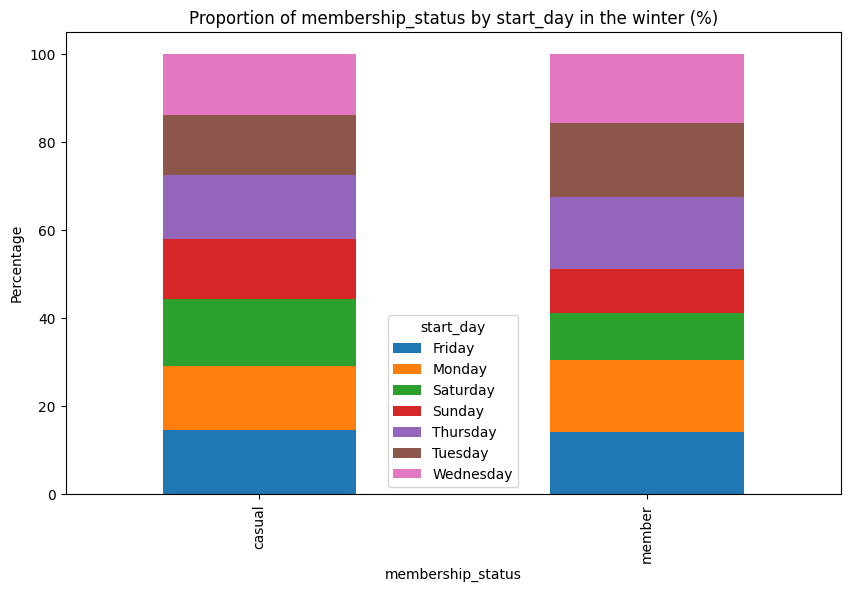

In [36]:
generate_prop_plot(data=winter_cyclistic_data, cat1='membership_status', cat2='start_day', event='winter')

### Explore time of rides, peak hours

In [37]:
'''Morning Rush Hour
Traffic congestion typically builds between 6 a.m. and 9 a.m., with the heaviest delays occurring from 7 a.m. to 9 a.m..
Lunch Hour Rush
Chicago experiences a midday traffic surge between 1 p.m. and 2 p.m. due to lunch breaks, particularly in the city center.
Evening Rush Hour
The evening rush extends from 3 p.m. to 7 p.m., peaking between 4 p.m. and 5 p.m..
Busiest Days of the Week
Fridays: Traffic volumes increase on Fridays, especially in the evenings, as residents and visitors head into the city for events and nightlife.
Thursdays: Traffic data indicates that more drivers are on the road on Thursdays, contributing to increased congestion.'''

'Morning Rush Hour\nTraffic congestion typically builds between 6 a.m. and 9 a.m., with the heaviest delays occurring from 7 a.m. to 9 a.m..\nLunch Hour Rush\nChicago experiences a midday traffic surge between 1 p.m. and 2 p.m. due to lunch breaks, particularly in the city center.\nEvening Rush Hour\nThe evening rush extends from 3 p.m. to 7 p.m., peaking between 4 p.m. and 5 p.m..\nBusiest Days of the Week\nFridays: Traffic volumes increase on Fridays, especially in the evenings, as residents and visitors head into the city for events and nightlife.\nThursdays: Traffic data indicates that more drivers are on the road on Thursdays, contributing to increased congestion.'

In [38]:
cyclistic_data = extract_hour(cyclistic_data)
cyclistic_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day,ride_length(min),month,start_hour
0,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,41.892278,-87.612043,41.902973,-87.631280,casual,00:19:08,1.990,Saturday,Saturday,19.133333,May,15
1,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,42.010587,-87.662412,42.001044,-87.661198,casual,00:10:09,1.065,Tuesday,Tuesday,10.150000,May,15
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday,23.200000,May,17
3,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,41.892270,-87.611946,41.936253,-87.652662,member,00:18:38,5.939,Friday,Friday,18.633333,May,20
4,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,41.903486,-87.643353,41.902973,-87.631280,casual,00:06:44,1.003,Wednesday,Wednesday,6.733333,May,18


#### Morning Rush Hour Analysis

In [39]:
morning_rush_hours = [7,8,9]
morning_rush_data = cyclistic_data.loc[cyclistic_data['start_hour'].isin(morning_rush_hours)]

###### Casual riders utilize electric scooters more often in morning rush hours

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                40.767264      54.469538          4.763197
member                45.677780      52.679704          1.642517


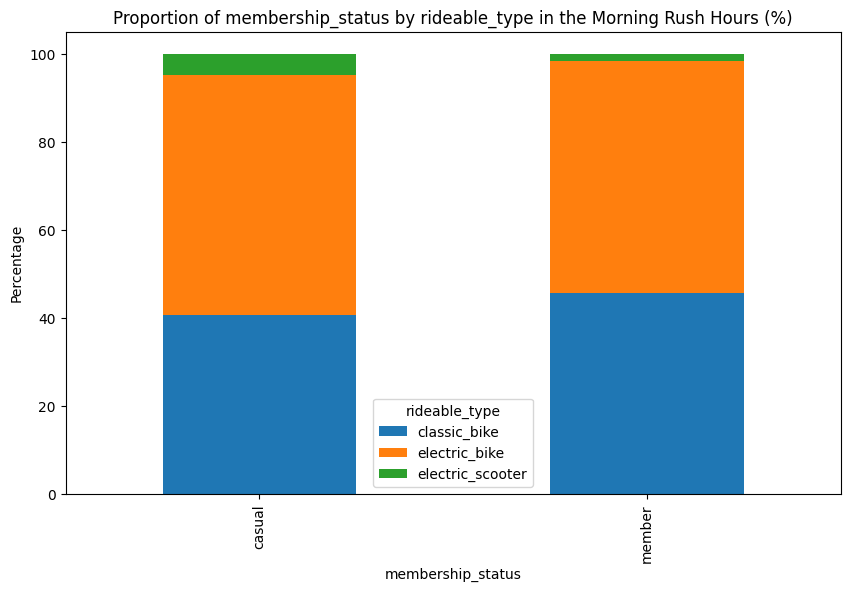

In [40]:
# generate_prop_plot(morning_rush_data, 'membership_status', 'rideable_type', 'Morning Rush Hours')
generate_prop_plot(data=morning_rush_data, cat1='membership_status', cat2='rideable_type', event='Morning Rush Hours')

###### Casual riders ride longer, starting from 09:00

In [41]:
'''pivot_table = morning_rush_data.pivot_table(
    values='ride_length(min)', 
    index='membership_status', 
    columns='start_hour', 
    aggfunc='median')


print(pivot_table)'''

"pivot_table = morning_rush_data.pivot_table(\n    values='ride_length(min)', \n    index='membership_status', \n    columns='start_hour', \n    aggfunc='median')\n\n\nprint(pivot_table)"

In [42]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Median Riding Time by Hour of Morning Rush and Membership Status')
plt.xlabel('Morning Hour')
plt.ylabel('Median Riding Time')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Median Riding Time by Hour of Morning Rush and Membership Status')\nplt.xlabel('Morning Hour')\nplt.ylabel('Median Riding Time')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

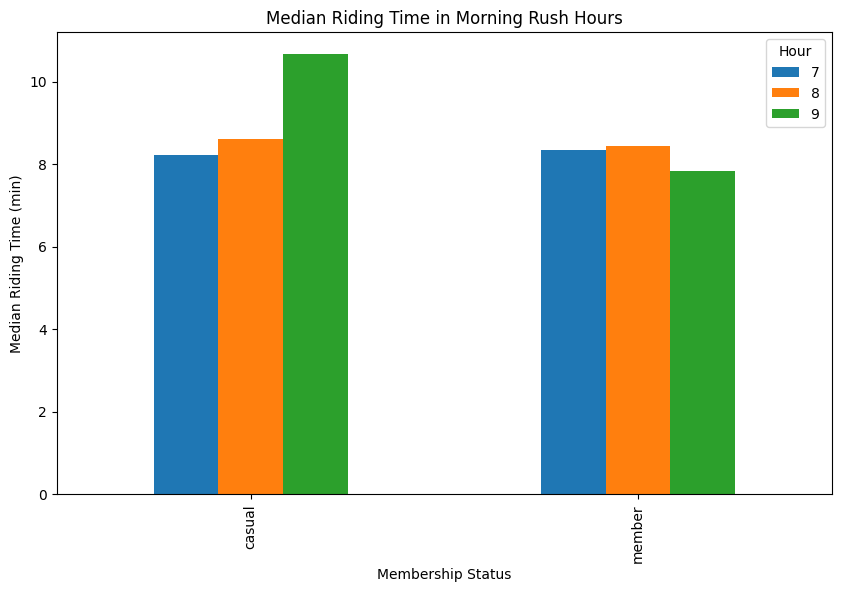

In [43]:
plot_pivot_table(data=morning_rush_data, index='membership_status', columns='start_hour', aggfunc='median', values='ride_length(min)', 
                 title='Median Riding Time in Morning Rush Hours', xlabel='Membership Status', ylabel='Median Riding Time (min)', legend_title='Hour')

###### No significant difference in riding distances

In [44]:
'''pivot_table = morning_rush_data.pivot_table(
    values='ride_distance(km)', 
    index='membership_status', 
    columns='start_hour', 
    aggfunc='median')


print(pivot_table)'''

"pivot_table = morning_rush_data.pivot_table(\n    values='ride_distance(km)', \n    index='membership_status', \n    columns='start_hour', \n    aggfunc='median')\n\n\nprint(pivot_table)"

In [45]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Median Riding Distance by Hour of Morning Rush and Membership Status')
plt.xlabel('Morning Hour')
plt.ylabel('Median Riding Distance(km)')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Median Riding Distance by Hour of Morning Rush and Membership Status')\nplt.xlabel('Morning Hour')\nplt.ylabel('Median Riding Distance(km)')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

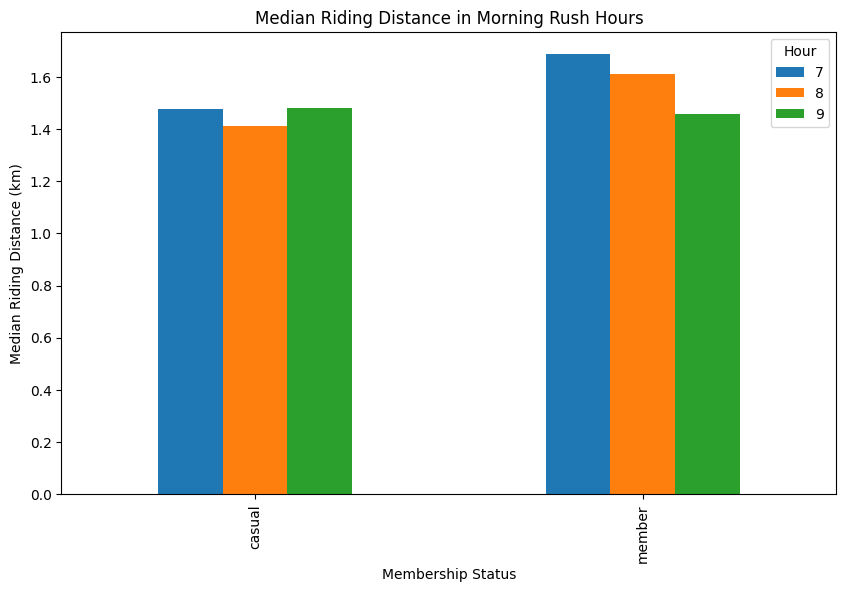

In [46]:
plot_pivot_table(data=morning_rush_data, index='membership_status', columns='start_hour', aggfunc='median', values='ride_distance(km)', 
                 title='Median Riding Distance in Morning Rush Hours', xlabel='Membership Status', ylabel='Median Riding Distance (km)', legend_title='Hour')

###### Riders in general, have higher riding frequencies, from 08:00 to 09:00

start_hour                 7          8          9
membership_status                                 
casual             26.101098  36.890966  37.007936
member             31.765661  40.609308  27.625031


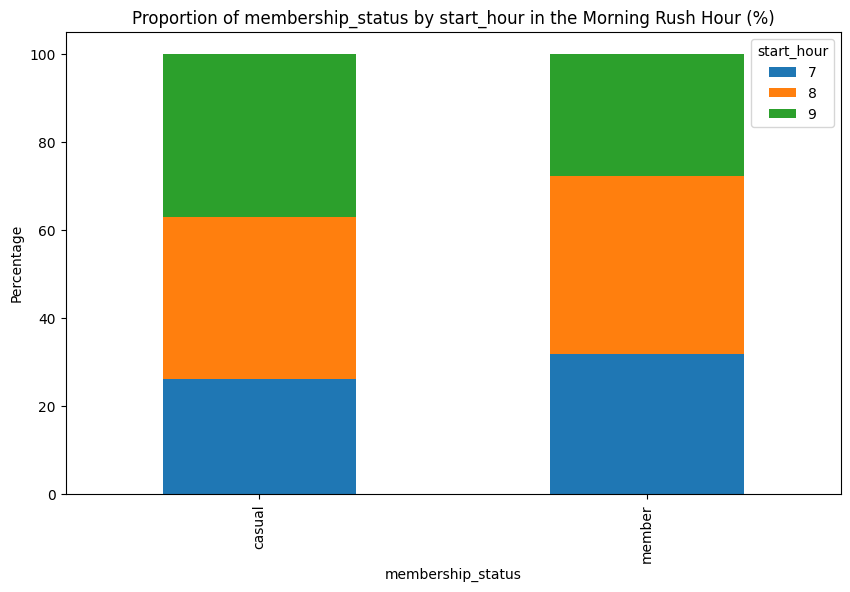

In [47]:
generate_prop_plot(data=morning_rush_data, cat1='membership_status', cat2='start_hour', event='Morning Rush Hour')

#### Midday Traffic Surge

In [48]:
midday_rush_hours = [12,13,14]
midday_rush_data = cyclistic_data.loc[cyclistic_data['start_hour'].isin(midday_rush_hours)]
midday_rush_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day,ride_length(min),month,start_hour
16,classic_bike,2024-05-31 12:02:35,2024-05-31 12:02:58,41.886835,-87.622320,41.886835,-87.622320,member,00:00:23,0.000,Friday,Friday,0.383333,May,12
23,classic_bike,2024-05-28 13:41:33,2024-05-28 13:53:13,41.866095,-87.607267,41.866095,-87.607267,member,00:11:40,0.000,Tuesday,Tuesday,11.666667,May,13
26,electric_bike,2024-05-23 12:58:17,2024-05-23 13:04:46,41.939409,-87.712197,41.930585,-87.723777,member,00:06:29,1.372,Thursday,Thursday,6.483333,May,12
58,classic_bike,2024-05-06 14:58:35,2024-05-06 15:02:19,41.921540,-87.653818,41.925566,-87.658416,casual,00:03:44,0.588,Monday,Monday,3.733333,May,14
64,classic_bike,2024-05-25 12:54:15,2024-05-25 13:02:04,41.944540,-87.654678,41.931248,-87.644336,member,00:07:49,1.707,Saturday,Saturday,7.816667,May,12


###### Casual members tend to utilize electric scooters more often than members do, in midday rush hours

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                47.440909      49.044561          3.514531
member                45.607700      52.910082          1.482219


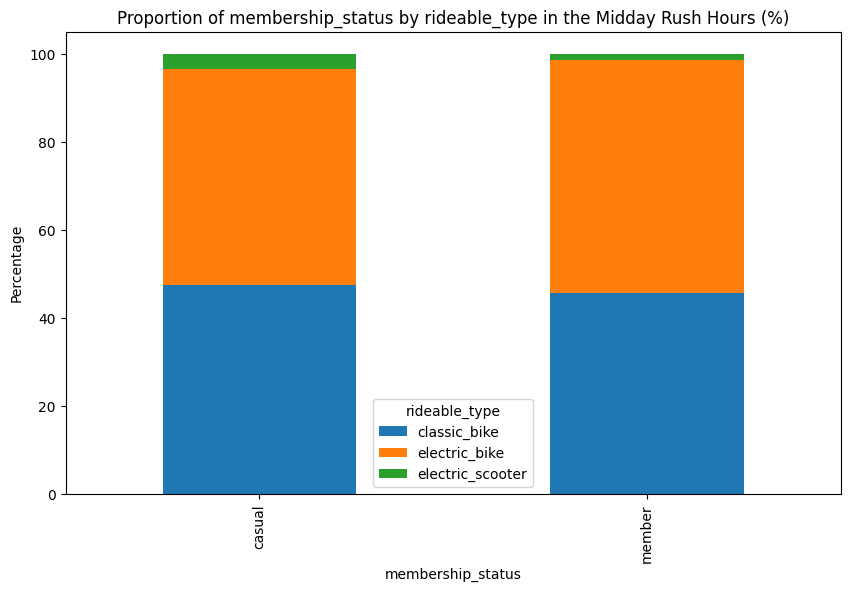

In [49]:
generate_prop_plot(midday_rush_data, 'membership_status', 'rideable_type', 'Midday Rush Hours')

###### Casual riders ride A LOT more longer in the midday hours

In [50]:
'''
pivot_table = midday_rush_data.pivot_table(
    values='ride_length(min)', 
    index='membership_status', 
    columns='start_hour', 
    aggfunc='median')


print(pivot_table)
'''

"\npivot_table = midday_rush_data.pivot_table(\n    values='ride_length(min)', \n    index='membership_status', \n    columns='start_hour', \n    aggfunc='median')\n\n\nprint(pivot_table)\n"

In [51]:
'''
pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Median Riding Time by Hour of Morning Rush and Membership Status')
plt.xlabel('Midday Hour')
plt.ylabel('Median Riding Time')
plt.legend(title='Membership Status')

# Show the plot
plt.show()
'''

"\npivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Median Riding Time by Hour of Morning Rush and Membership Status')\nplt.xlabel('Midday Hour')\nplt.ylabel('Median Riding Time')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()\n"

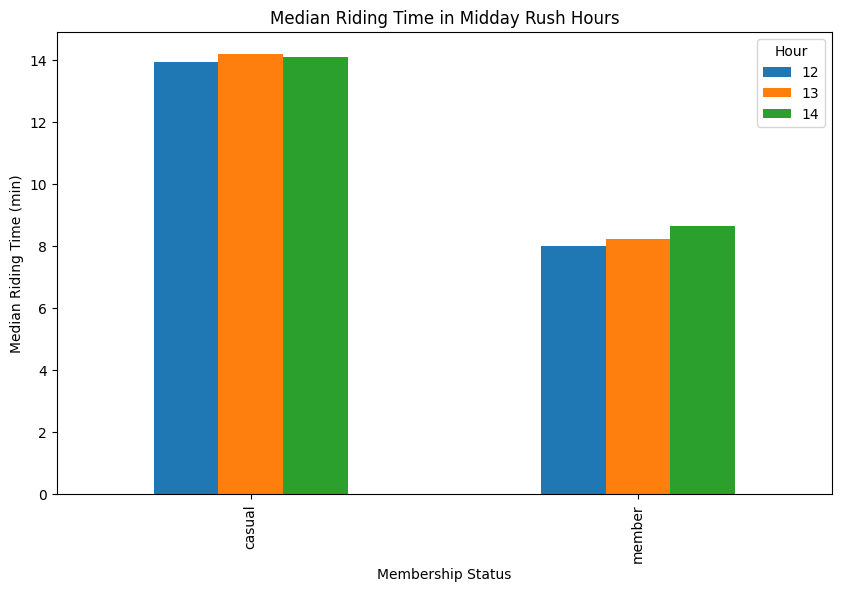

In [52]:
plot_pivot_table(data=midday_rush_data, index='membership_status', columns='start_hour', aggfunc='median', values='ride_length(min)', 
                 title='Median Riding Time in Midday Rush Hours', xlabel='Membership Status', ylabel='Median Riding Time (min)', legend_title='Hour')

###### Casual riders ride for longer distances in the midday

In [53]:
'''pivot_table = midday_rush_data.pivot_table(
    values='ride_distance(km)', 
    index='membership_status', 
    columns='start_hour', 
    aggfunc='median')


print(pivot_table)'''

"pivot_table = midday_rush_data.pivot_table(\n    values='ride_distance(km)', \n    index='membership_status', \n    columns='start_hour', \n    aggfunc='median')\n\n\nprint(pivot_table)"

In [54]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Median Riding Distance by Hour of Morning Rush and Membership Status')
plt.xlabel('Midday Hour')
plt.ylabel('Median Riding Distance(km)')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Median Riding Distance by Hour of Morning Rush and Membership Status')\nplt.xlabel('Midday Hour')\nplt.ylabel('Median Riding Distance(km)')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

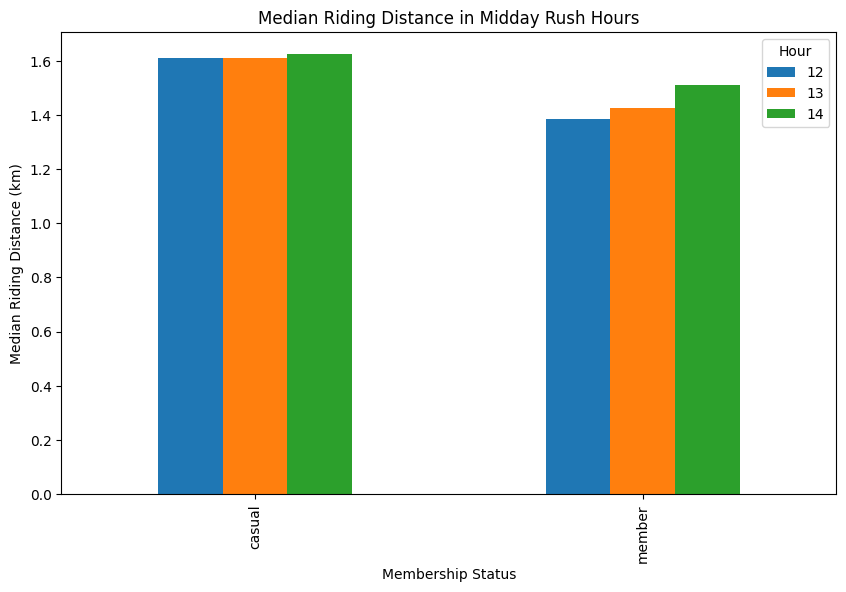

In [55]:
plot_pivot_table(data=midday_rush_data, index='membership_status', columns='start_hour', aggfunc='median', values='ride_distance(km)', 
                 title='Median Riding Distance in Midday Rush Hours', xlabel='Membership Status', ylabel='Median Riding Distance (km)', legend_title='Hour')

###### No observable difference in riding frequencies in midday

start_hour                12         13         14
membership_status                                 
casual             32.015102  33.255690  34.729208
member             33.487851  33.229831  33.282318


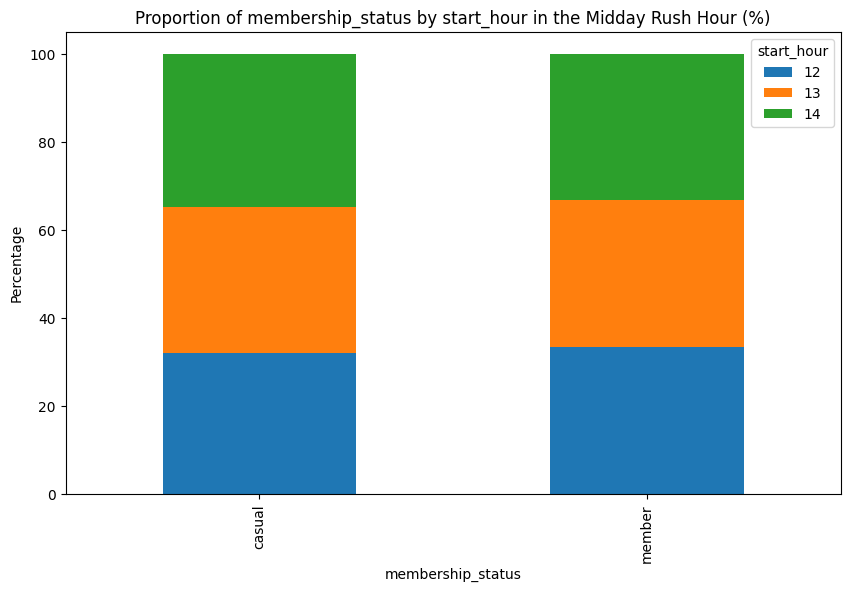

In [56]:
generate_prop_plot(midday_rush_data, 'membership_status', 'start_hour', 'Midday Rush Hour')

#### Evening Rush Hour Analysis

In [57]:
evening_rush_hours = [16, 17, 18]
evening_rush_data = cyclistic_data.loc[cyclistic_data['start_hour'].isin(evening_rush_hours)]
evening_rush_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day,ride_length(min),month,start_hour
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday,23.200000,May,17
4,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,41.903486,-87.643353,41.902973,-87.631280,casual,00:06:44,1.003,Wednesday,Wednesday,6.733333,May,18
7,classic_bike,2024-05-19 17:21:18,2024-05-19 17:51:29,41.880419,-87.655519,41.867118,-87.641088,casual,00:30:11,1.902,Sunday,Sunday,30.183333,May,17
8,classic_bike,2024-05-19 17:20:40,2024-05-19 17:51:26,41.880419,-87.655519,41.867118,-87.641088,casual,00:30:46,1.902,Sunday,Sunday,30.766667,May,17
10,classic_bike,2024-05-21 17:11:35,2024-05-21 17:38:45,41.892278,-87.612043,41.870769,-87.625734,member,00:27:10,2.646,Tuesday,Tuesday,27.166667,May,17


###### Casuals utilize electric scooters more often than members, in evening rush hours

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                44.169383      51.709991          4.120627
member                45.446883      52.913715          1.639403


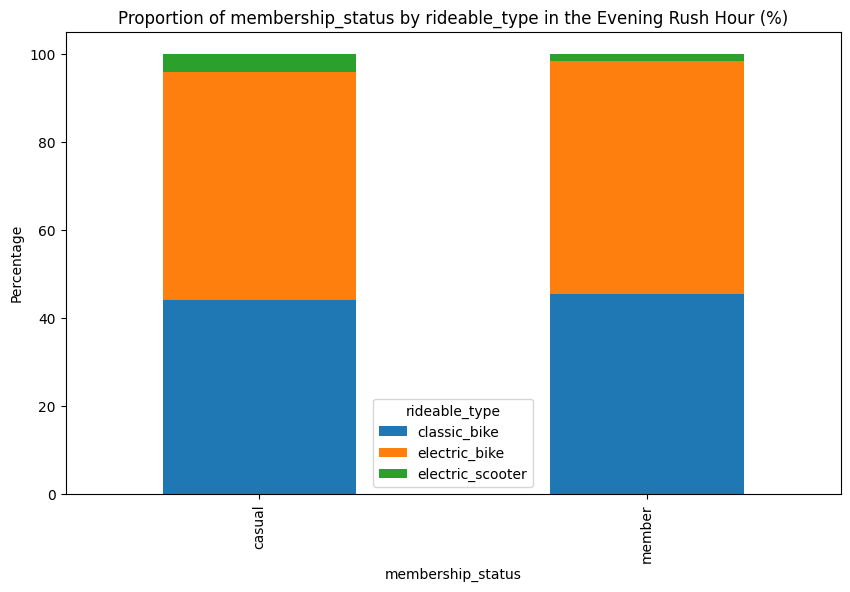

In [58]:
generate_prop_plot(evening_rush_data, 'membership_status', 'rideable_type', 'Evening Rush Hour')

###### Casuals ride A LOT more longer in evening rush hours

In [59]:
'''pivot_table = evening_rush_data.pivot_table(
    values='ride_length(min)', 
    index='membership_status', 
    columns='start_hour', 
    aggfunc='median')


print(pivot_table)'''

"pivot_table = evening_rush_data.pivot_table(\n    values='ride_length(min)', \n    index='membership_status', \n    columns='start_hour', \n    aggfunc='median')\n\n\nprint(pivot_table)"

In [60]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Median Riding Time by Hour of Morning Rush and Membership Status')
plt.xlabel('Midday Hour')
plt.ylabel('Median Riding Time')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Median Riding Time by Hour of Morning Rush and Membership Status')\nplt.xlabel('Midday Hour')\nplt.ylabel('Median Riding Time')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

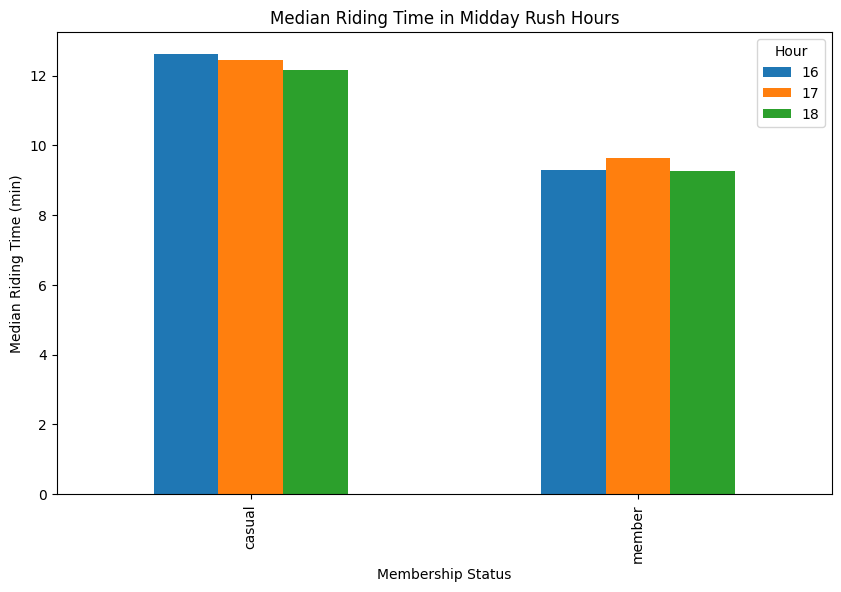

In [61]:
plot_pivot_table(data=evening_rush_data, index='membership_status', columns='start_hour', aggfunc='median', values='ride_length(min)', 
                 title='Median Riding Time in Midday Rush Hours', xlabel='Membership Status', ylabel='Median Riding Time (min)', legend_title='Hour')

###### Ride Distances, no observable differences

In [62]:
'''pivot_table = evening_rush_data.pivot_table(
    values='ride_distance(km)', 
    index='membership_status', 
    columns='start_hour', 
    aggfunc='median')


print(pivot_table)'''

"pivot_table = evening_rush_data.pivot_table(\n    values='ride_distance(km)', \n    index='membership_status', \n    columns='start_hour', \n    aggfunc='median')\n\n\nprint(pivot_table)"

In [63]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Median Riding Distance by Hour of Morning Rush and Membership Status')
plt.xlabel('Midday Hour')
plt.ylabel('Median Riding Distance(km)')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Median Riding Distance by Hour of Morning Rush and Membership Status')\nplt.xlabel('Midday Hour')\nplt.ylabel('Median Riding Distance(km)')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

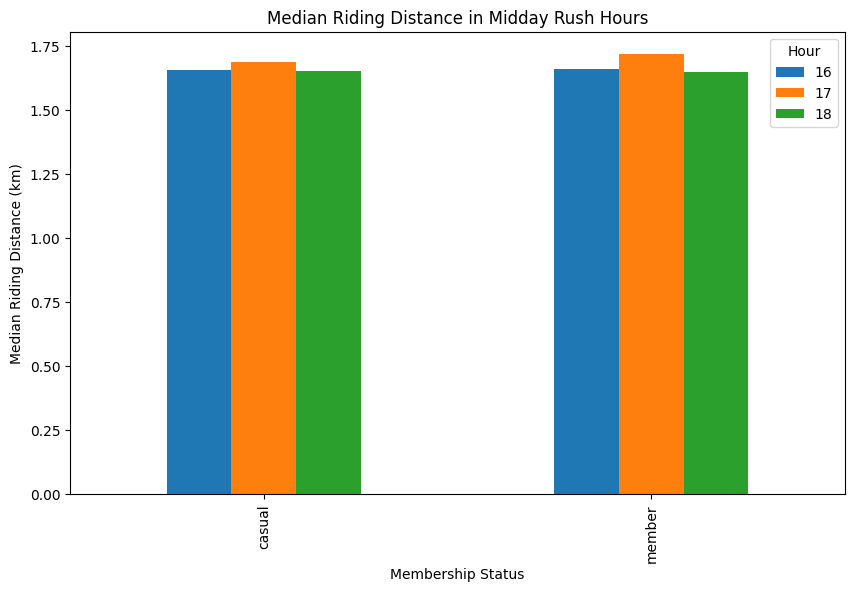

In [64]:
plot_pivot_table(data=evening_rush_data, index='membership_status', columns='start_hour', aggfunc='median', values='ride_distance(km)', 
                 title='Median Riding Distance in Midday Rush Hours', xlabel='Membership Status', ylabel='Median Riding Distance (km)', legend_title='Hour')

###### No observable difference

start_hour                16         17         18
membership_status                                 
casual             33.411945  35.844883  30.743172
member             32.958406  37.596701  29.444893


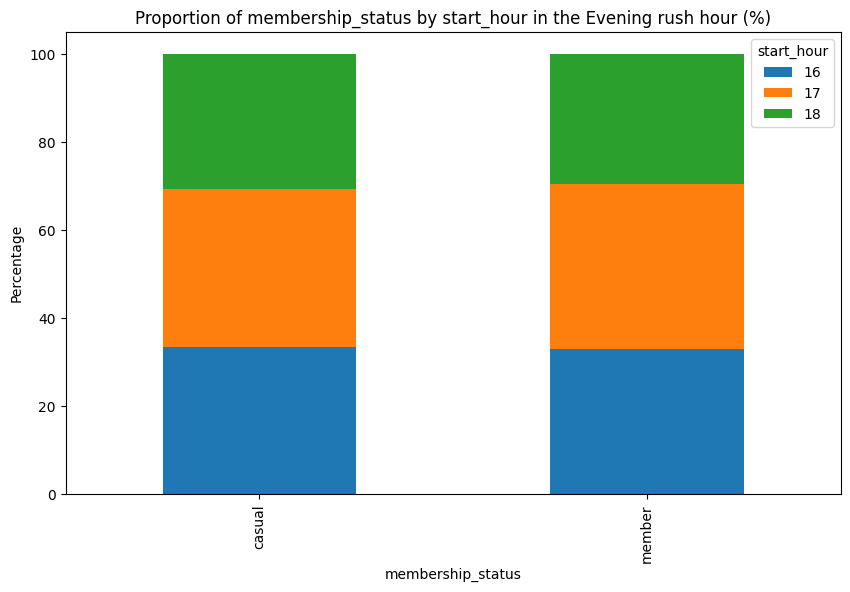

In [65]:
generate_prop_plot(evening_rush_data, 'membership_status', 'start_hour', 'Evening rush hour')

#### Busiest Days of the Week (Thursdays and Fridays)

In [66]:
busyDays = ['Thursday', 'Friday']

busy_day_data = cyclistic_data.loc[cyclistic_data['start_day'].isin(busyDays)]
busy_day_data.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,membership_status,ride_length,ride_distance(km),start_day,end_day,ride_length(min),month,start_hour
2,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,41.892278,-87.612043,41.870769,-87.625734,member,00:23:12,2.646,Thursday,Thursday,23.200000,May,17
3,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,41.892270,-87.611946,41.936253,-87.652662,member,00:18:38,5.939,Friday,Friday,18.633333,May,20
6,classic_bike,2024-05-17 08:39:54,2024-05-17 08:49:35,41.935880,-87.678420,41.936253,-87.652662,casual,00:09:41,2.137,Friday,Friday,9.683333,May,8
13,classic_bike,2024-05-09 17:38:03,2024-05-09 17:41:37,41.845687,-87.622481,41.845687,-87.622481,member,00:03:34,0.000,Thursday,Thursday,3.566667,May,17
14,classic_bike,2024-05-09 17:42:22,2024-05-09 17:42:49,41.845687,-87.622481,41.845687,-87.622481,member,00:00:27,0.000,Thursday,Thursday,0.450000,May,17


###### Casual riders ride electric scooters more often

rideable_type      classic_bike  electric_bike  electric_scooter
membership_status                                               
casual                41.650355      54.298663          4.050983
member                43.461637      54.929813          1.608550


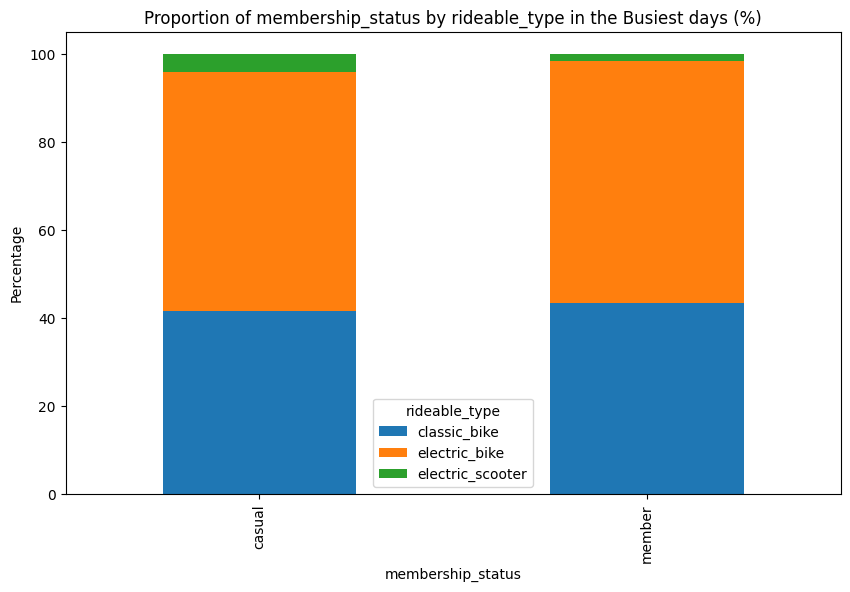

In [67]:
generate_prop_plot(busy_day_data, 'membership_status', 'rideable_type', 'Busiest days')

###### Casual riders ride more on Fridays

start_day             Friday   Thursday
membership_status                      
casual             55.270185  44.729815
member             48.740258  51.259742


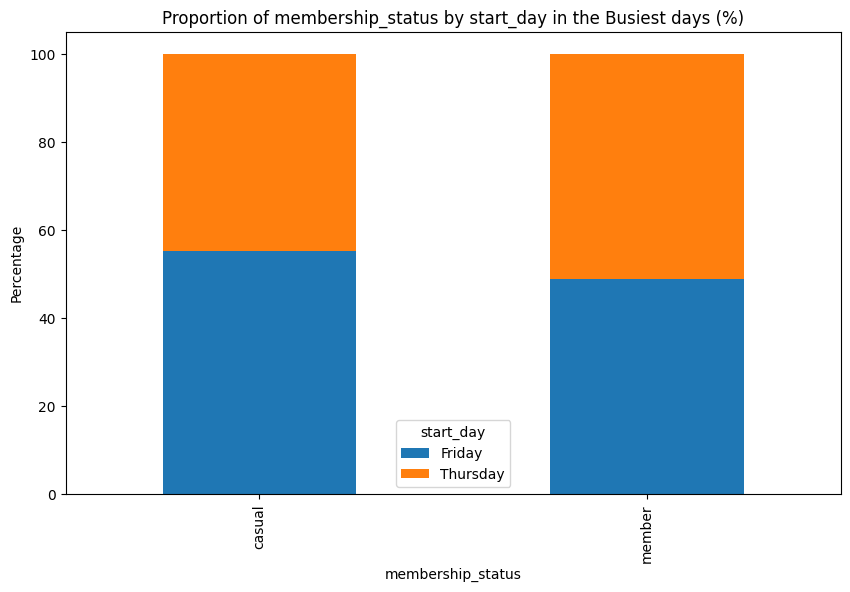

In [68]:
generate_prop_plot(busy_day_data, 'membership_status', 'start_day', 'Busiest days')

###### Casuals ride for longer periods on busy days of the week, especially on Fridays

In [69]:
'''pivot_table = busy_day_data.pivot_table(
    values='ride_length(min)', 
    index='membership_status', 
    columns='start_day', 
    aggfunc='median')


print(pivot_table)'''

"pivot_table = busy_day_data.pivot_table(\n    values='ride_length(min)', \n    index='membership_status', \n    columns='start_day', \n    aggfunc='median')\n\n\nprint(pivot_table)"

In [70]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Average Ride Length by Day of Week and Membership Status')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Length (minutes)')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Average Ride Length by Day of Week and Membership Status')\nplt.xlabel('Day of Week')\nplt.ylabel('Average Ride Length (minutes)')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

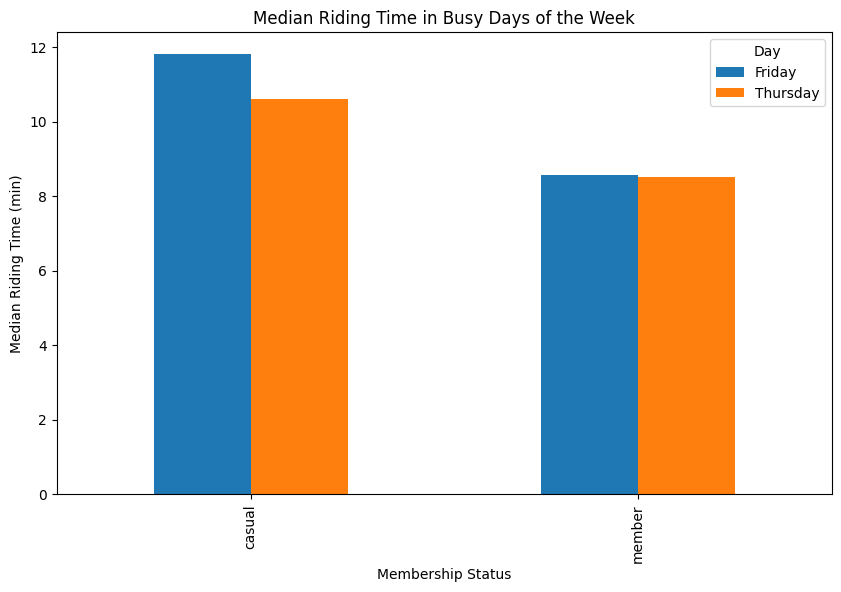

In [71]:
plot_pivot_table(data=busy_day_data, index='membership_status', columns='start_day', aggfunc='median', values='ride_length(min)', 
                 title='Median Riding Time in Busy Days of the Week', xlabel='Membership Status', ylabel='Median Riding Time (min)', legend_title='Day')

###### No observable differences in ride distances on busy days of the week

In [72]:
'''pivot_table = busy_day_data.pivot_table(
    values='ride_distance(km)', 
    index='membership_status', 
    columns='start_day', 
    aggfunc='median')


print(pivot_table)'''

"pivot_table = busy_day_data.pivot_table(\n    values='ride_distance(km)', \n    index='membership_status', \n    columns='start_day', \n    aggfunc='median')\n\n\nprint(pivot_table)"

In [73]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Median Ride Distance by Day of Week and Membership Status')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Distance (km)')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('Median Ride Distance by Day of Week and Membership Status')\nplt.xlabel('Day of Week')\nplt.ylabel('Average Ride Distance (km)')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

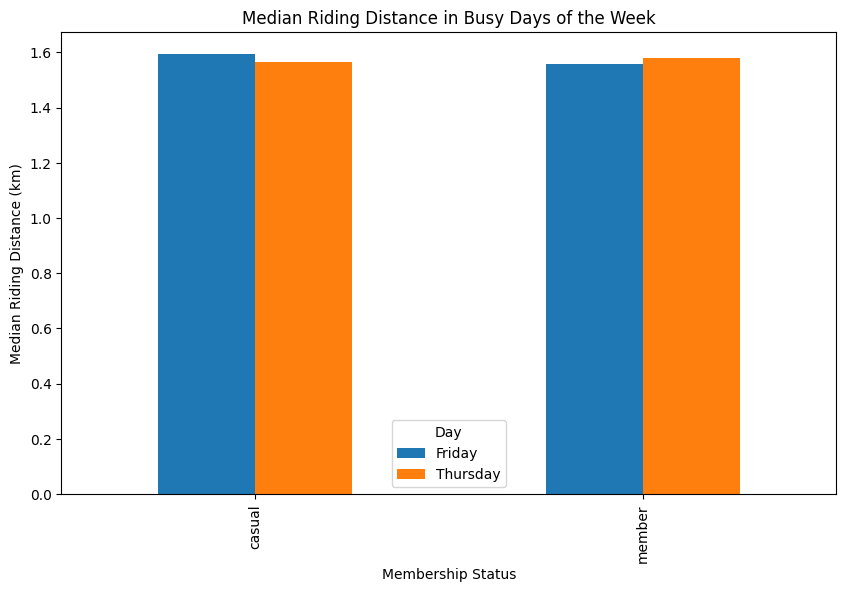

In [74]:
plot_pivot_table(data=busy_day_data, index='membership_status', columns='start_day', aggfunc='median', values='ride_distance(km)', 
                 title='Median Riding Distance in Busy Days of the Week', xlabel='Membership Status', ylabel='Median Riding Distance (km)', legend_title='Day')

### Explore monthly trends


In [75]:
cyclistic_data['month'].value_counts()

month
September    811887
August       750175
July         743615
June         705254
October      611850
May          605595
April        368613
November     332730
March        295592
December     176743
February     150681
January      137305
Name: count, dtype: int64

###### General trends

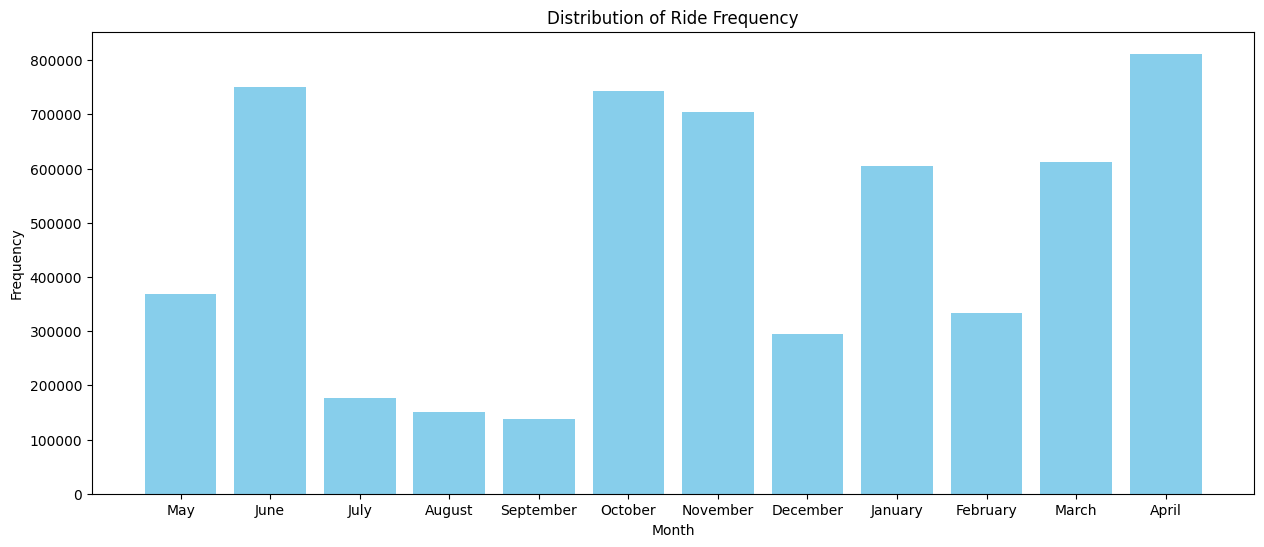

In [76]:
values = cyclistic_data['month'].value_counts().sort_index()

plt.figure(figsize=(15, 6))

plt.bar(cyclistic_data['month'].unique(), values, color='skyblue')

plt.xticks(values.index, values.index)  

# Add titles and labels
plt.title('Distribution of Ride Frequency')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Show the plot
plt.show()

###### Member vs Casual Trend

In [77]:
'''pivot_table = cyclistic_data.pivot_table(
    index='month', 
    columns='membership_status', 
    aggfunc='size')


print(pivot_table)'''

"pivot_table = cyclistic_data.pivot_table(\n    index='month', \n    columns='membership_status', \n    aggfunc='size')\n\n\nprint(pivot_table)"

###### Grossing periods: June to September

In [78]:
'''pivot_table.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('No.of Rides by Day of Week and Membership Status')
plt.xlabel('Day of Week')
plt.ylabel('No. of Rides')
plt.legend(title='Membership Status')

# Show the plot
plt.show()'''

"pivot_table.plot(kind='bar', figsize=(10, 6))\n\n# Customize the plot\nplt.title('No.of Rides by Day of Week and Membership Status')\nplt.xlabel('Day of Week')\nplt.ylabel('No. of Rides')\nplt.legend(title='Membership Status')\n\n# Show the plot\nplt.show()"

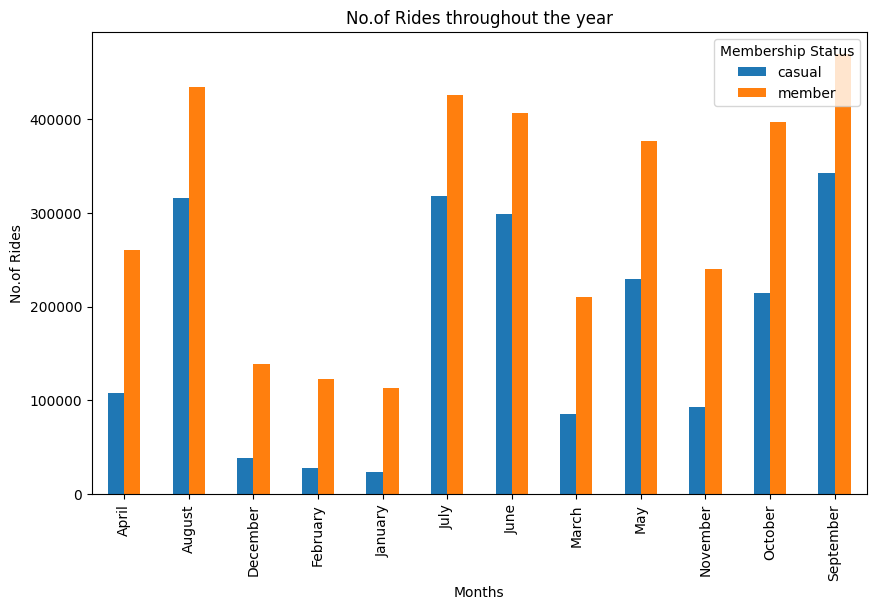

In [79]:
plot_pivot_table(data=cyclistic_data, index='month', columns='membership_status', aggfunc='size', 
                 title='No.of Rides throughout the year', xlabel='Months', ylabel='No.of Rides', legend_title='Membership Status')

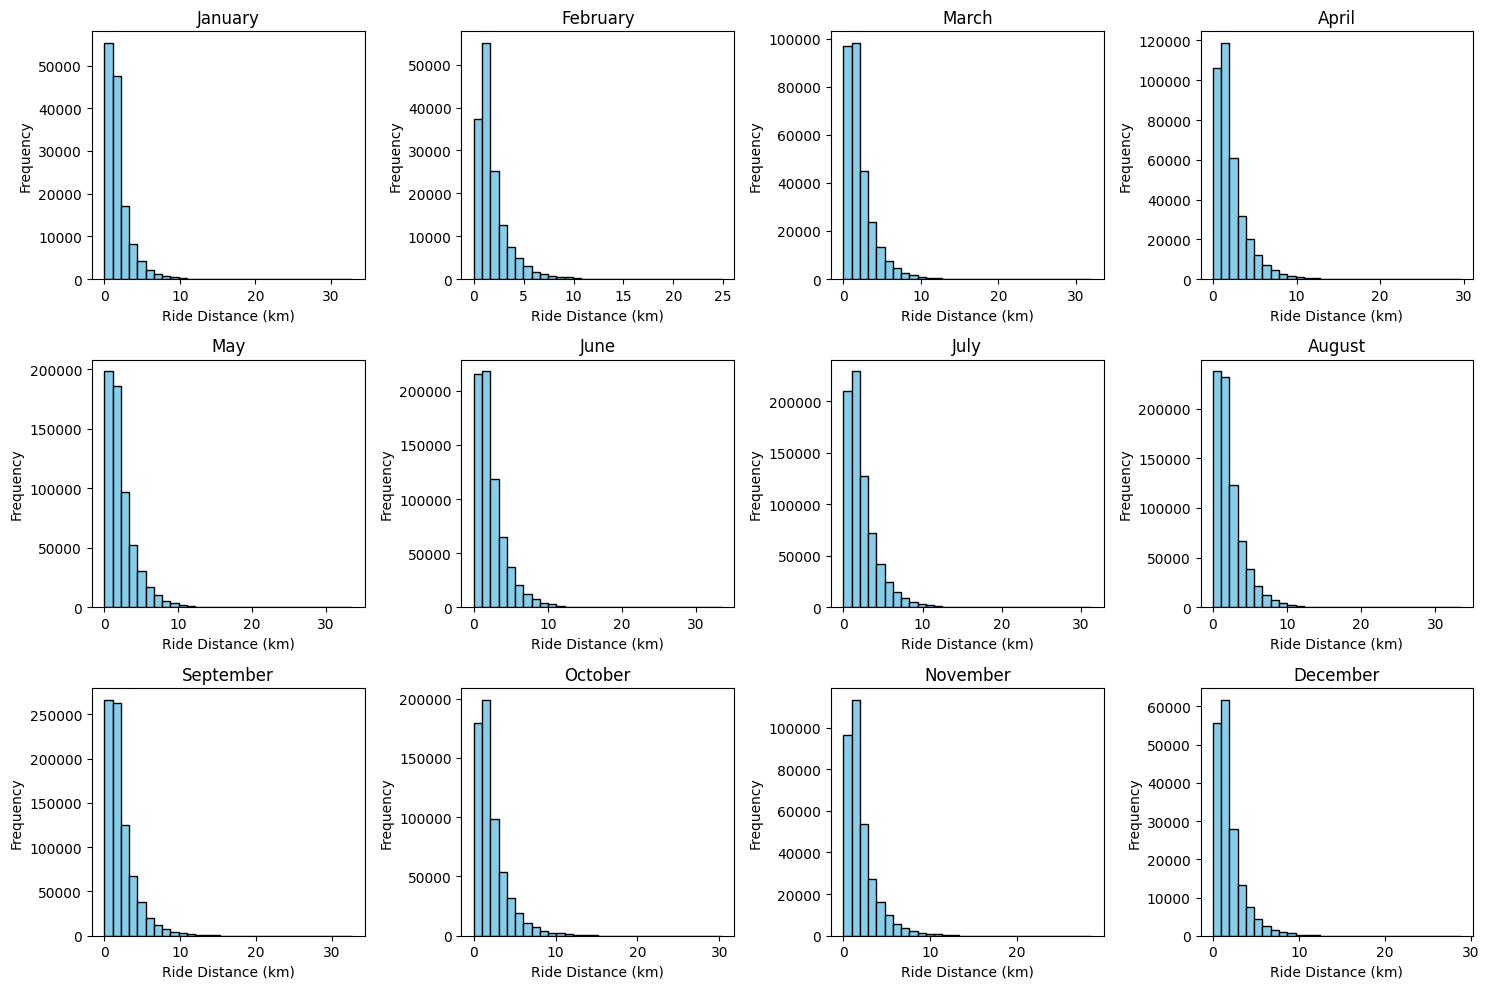

In [80]:
# List of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Create a histogram for each month in a separate subplot
for i, month in enumerate(months):
    month_data = cyclistic_data[cyclistic_data['month'] == month]
    axes[i].hist(month_data['ride_distance(km)'], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(month)
    axes[i].set_xlabel('Ride Distance (km)')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()


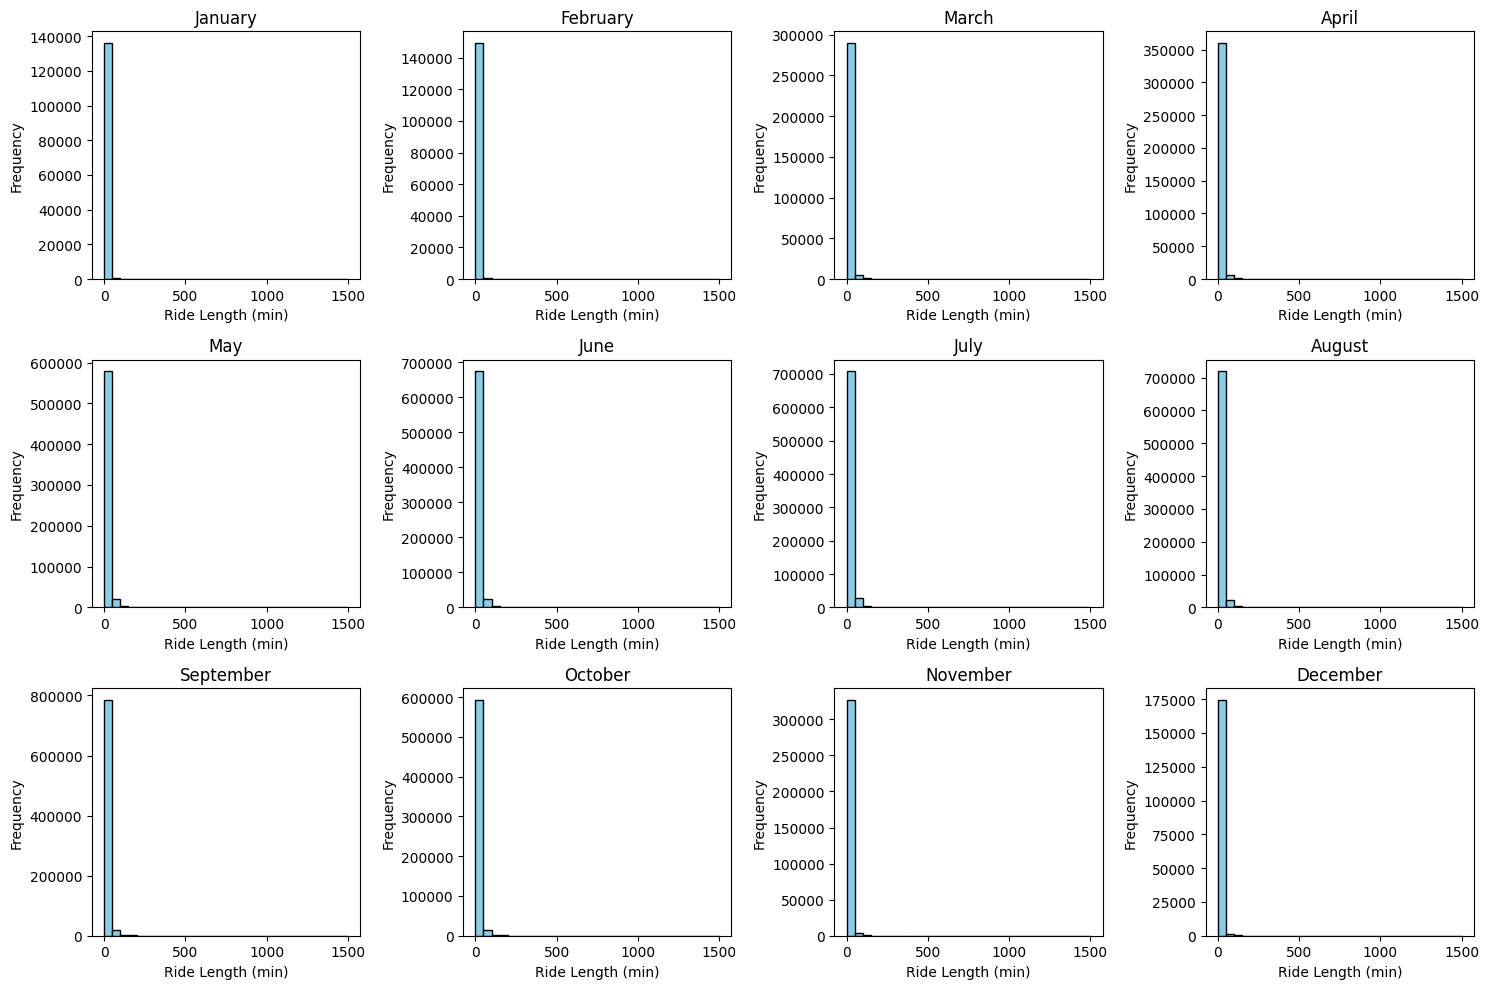

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Create a histogram for each month in a separate subplot
for i, month in enumerate(months):
    month_data = cyclistic_data[cyclistic_data['month'] == month]
    axes[i].hist(month_data['ride_length(min)'], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(month)
    axes[i].set_xlabel('Ride Length (min)')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

### Explore hotspots, and geographic clustering

In [82]:
'''from geocode import generate_heatmap

casual_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'casual']

generate_heatmap(casual_cyclistic_data, 'Casual')'''

"from geocode import generate_heatmap\n\ncasual_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'casual']\n\ngenerate_heatmap(casual_cyclistic_data, 'Casual')"

In [83]:
'''member_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'member']

generate_heatmap(member_cyclistic_data, 'Member')'''

"member_cyclistic_data = cyclistic_data.loc[cyclistic_data['membership_status'] == 'member']\n\ngenerate_heatmap(member_cyclistic_data, 'Member')"